<a href="https://colab.research.google.com/github/hfwalvir/PortfolioProject/blob/main/Payment_practices_(analysis_involving_NLP_and_Federated_Learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import cosine
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
data = pd.read_csv('/content/sample_data/payment-practices.csv')
data.head(5)

,Report Id,Start date,End date,Filing date,Company,Company number,Payments made in the reporting period,Average time to pay,% Invoices paid within 30 days,% Invoices paid between 31 and 60 days,...,Longest standard payment period,Maximum contractual payment period,Payment terms have changed,Suppliers notified of changes,Participates in payment codes,E-Invoicing offered,Supply-chain financing offered,Policy covers charges for remaining on supplier list,Charges have been made for remaining on supplier list,URL
0,2,2017-04-29,2017-10-28,2017-11-07,MEDTRONIC LIMITED,01070807,NaN,25.0,77.0,20.0,...,60.0,60.0,False,NaN,False,True,False,False,False,https://check-payment-practices.service.gov.uk...
1,3,2017-05-01,2017-10-31,2017-11-08,SEBDEN STEEL SERVICE CENTRES LIMITED,02553464,NaN,69.0,7.0,28.0,...,NaN,75.0,False,NaN,False,False,False,False,False,https://check-payment-practices.service.gov.uk...
2,4,2017-04-15,2017-10-14,2017-11-08,GREENERGY FLEXIGRID LIMITED,07581532,NaN,21.0,89.0,9.0,...,30.0,30.0,False,NaN,False,False,False,True,True,https://check-payment-practices.service.gov.uk...
3,5,2017-04-15,2017-10-14,2017-11-08,GREENERGY FUELS LIMITED,04058825,NaN,14.0,90.0,8.0,...,30.0,30.0,False,NaN,False,False,False,True,True,https://check-payment-practices.service.gov.uk...
4,6,2017-04-15,2017-10-14,2017-11-08,GREENERGY INTERNATIONAL LIMITED,02809935,NaN,15.0,96.0,2.0,...,30.0,30.0,False,NaN,False,False,False,True,False,https://check-payment-practices.service.gov.uk...


In [ ]:
data['Company number'] = data['Company number'].astype(str)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59335 entries, 0 to 59334
Data columns (total 23 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Report Id                                              59335 non-null  int64  
 1   Start date                                             59335 non-null  object 
 2   End date                                               59335 non-null  object 
 3   Filing date                                            59335 non-null  object 
 4   Company                                                59335 non-null  object 
 5   Company number                                         59335 non-null  object 
 6   Payments made in the reporting period                  46023 non-null  object 
 7   Average time to pay                                    53878 non-null  float64
 8   % Invoices paid within 30 days                

# BASIC DATA ANALYSIS

In [ ]:
data.describe()


,Report Id,Average time to pay,% Invoices paid within 30 days,% Invoices paid between 31 and 60 days,% Invoices paid later than 60 days,% Invoices not paid within agreed terms,Shortest (or only) standard payment period,Longest standard payment period,Maximum contractual payment period
count,59335.000000,53878.000000,53878.000000,53878.000000,53878.000000,53988.000000,53988.000000,35840.000000,53988.000000
mean,30367.138215,36.953339,55.253257,30.560581,14.179554,28.587501,20.819904,70.800642,73.858024
std,17462.471407,22.890102,28.465922,20.619959,16.870164,24.019565,22.276337,46.828510,89.540909
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,15264.500000,25.000000,31.000000,13.000000,3.000000,9.000000,1.000000,60.000000,45.000000
50%,30414.000000,34.000000,57.000000,28.000000,8.000000,23.000000,15.000000,60.000000,60.000000
75%,45502.500000,46.000000,80.000000,45.000000,19.000000,42.000000,30.000000,90.000000,90.000000
max,60516.000000,1000.000000,100.000000,100.000000,100.000000,100.000000,1000.000000,1264.000000,5475.000000


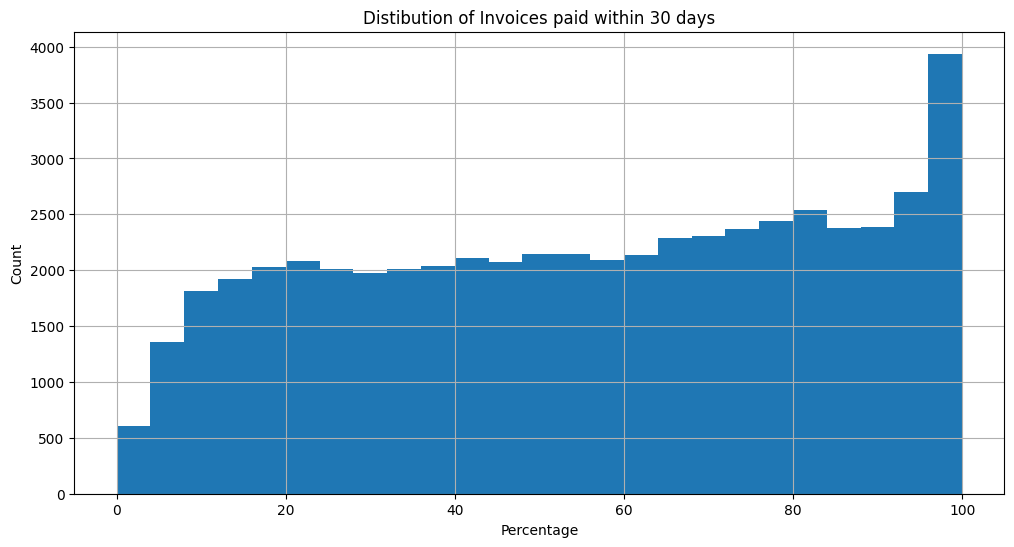

In [ ]:
#Analyze payment practices
plt.figure(figsize=(12,6))
data['% Invoices paid within 30 days'].hist(bins=25)
plt.title('Distibution of Invoices paid within 30 days')
plt.xlabel('Percentage')
plt.ylabel('Count')
plt.show()

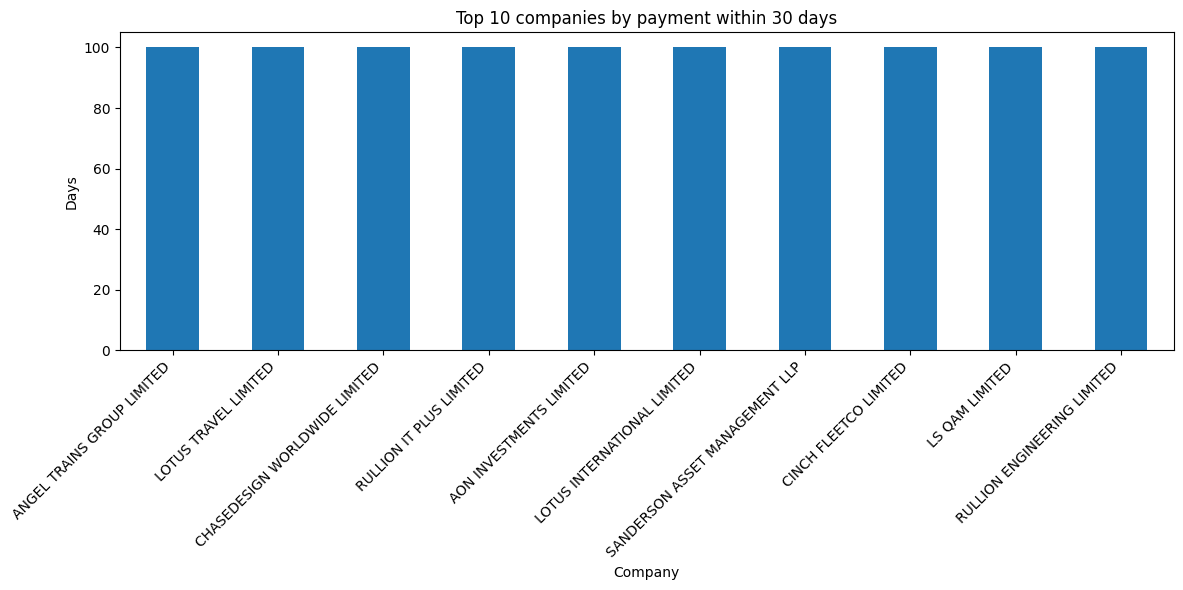

In [ ]:
plt.figure(figsize=(12,6))
data.groupby('Company')['% Invoices paid within 30 days'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 companies by payment within 30 days")
plt.xlabel("Company")
plt.ylabel('Days')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

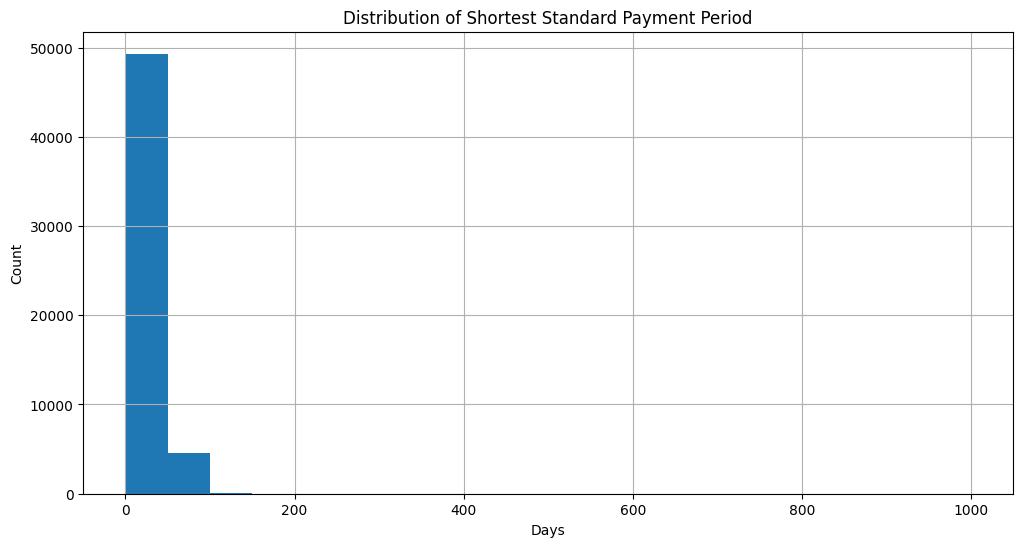

In [ ]:
plt.figure(figsize=(12, 6))
data['Shortest (or only) standard payment period'].hist(bins=20)
plt.title('Distribution of Shortest Standard Payment Period')
plt.xlabel('Days')
plt.ylabel('Count')
plt.show()

In [ ]:
data = data.dropna()

In [ ]:
#Clustering companies based on payment practices
X = data[['% Invoices paid within 30 days','% Invoices paid between 31 and 60 days',
          '% Invoices paid later than 60 days']]
kmeans = KMeans(n_clusters=3,random_state = 42)
labels= kmeans.fit_predict(X)
data['cluster'] = labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-12-c64afee26394>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = labels


In [ ]:
data.head(5)

,Report Id,Start date,End date,Filing date,Company,Company number,Payments made in the reporting period,Average time to pay,% Invoices paid within 30 days,% Invoices paid between 31 and 60 days,...,Maximum contractual payment period,Payment terms have changed,Suppliers notified of changes,Participates in payment codes,E-Invoicing offered,Supply-chain financing offered,Policy covers charges for remaining on supplier list,Charges have been made for remaining on supplier list,URL,cluster
8941,9213,2018-06-01,2018-12-01,2018-12-20,PZ CUSSONS BEAUTY LLP,OC364213,True,68.0,22.0,30.0,...,75.0,True,True,False,False,False,False,False,https://check-payment-practices.service.gov.uk...,0
8942,9214,2018-06-01,2018-12-01,2018-12-20,PZ CUSSONS (UK) LIMITED,00748096,True,73.0,12.0,32.0,...,75.0,True,True,False,False,False,False,False,https://check-payment-practices.service.gov.uk...,0
9040,9319,2018-06-01,2018-11-30,2019-01-02,AMINO COMMUNICATIONS LIMITED,03490180,True,24.0,74.0,23.0,...,60.0,True,True,False,False,False,False,False,https://check-payment-practices.service.gov.uk...,1
9175,9457,2018-06-30,2018-12-29,2019-01-14,CREED FOODSERVICE LIMITED,01065559,True,37.0,45.0,44.0,...,75.0,True,True,False,False,False,False,False,https://check-payment-practices.service.gov.uk...,2
9214,9496,2018-07-01,2018-12-31,2019-01-15,ROCHE DIAGNOSTICS LIMITED,00571546,True,34.0,66.0,21.0,...,90.0,True,True,False,False,False,False,False,https://check-payment-practices.service.gov.uk...,1


In [ ]:
import seaborn as sns

# **VISUALIZING EACH CLUSTER OF COMPANIES**

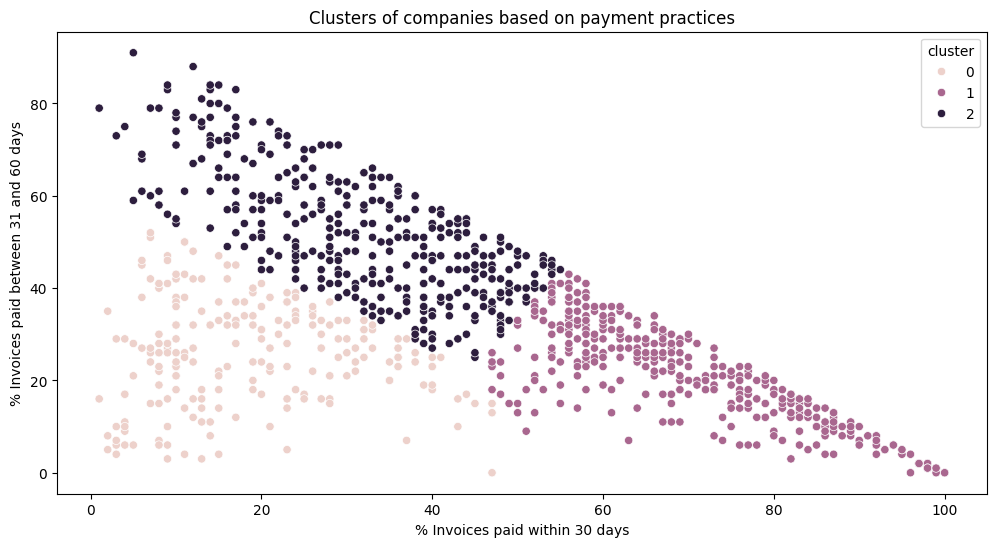

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='% Invoices paid within 30 days',
                y ='% Invoices paid between 31 and 60 days' ,
                hue='cluster'
                ,
                data=data)
plt.title("Clusters of companies based on payment practices")
plt.xlabel('% Invoices paid within 30 days')
plt.ylabel('% Invoices paid between 31 and 60 days')
plt.show()

# **Analyzing characterisitics of each cluster**


In [ ]:
#analyzing characterisitics of each cluster
for cluster in data['cluster'].unique():
  print(f'Cluster {cluster}:')
  print(data[data['cluster']==cluster].describe())


Cluster 0:
          Report Id  Average time to pay  % Invoices paid within 30 days  \
count    222.000000           222.000000                      222.000000   
mean   34195.752252            70.337838                       18.567568   
std    13390.736097            29.251110                       11.253654   
min     9213.000000            27.000000                        1.000000   
25%    23163.750000            57.000000                        9.000000   
50%    35924.500000            67.000000                       16.000000   
75%    44278.500000            75.000000                       26.750000   
max    60236.000000           391.000000                       47.000000   

       % Invoices paid between 31 and 60 days  \
count                              222.000000   
mean                                25.842342   
std                                 11.236552   
min                                  0.000000   
25%                                 18.000000   
50%       

# **DIMENSIONALITY REDUCTION + VISUALIZATION**

In [ ]:
pca = PCA(n_components=2) #only considering cluster 1 and 2 for the analysis assuming that most of the payment practices is summed up within these 2 clusterfs
X_pca = pca.fit_transform(X)


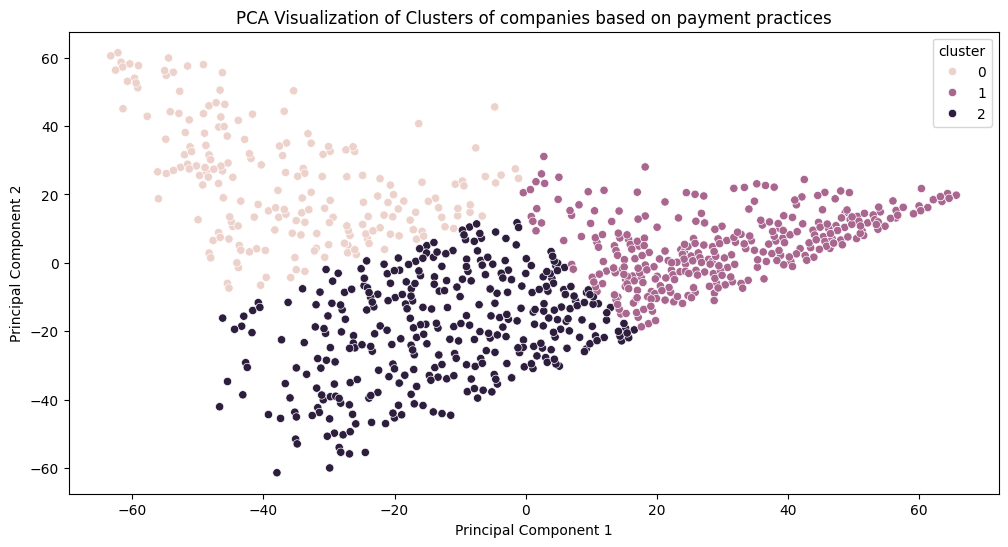

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=X_pca[:,0],y=X_pca[:,1],hue=data['cluster'])
plt.title("PCA Visualization of Clusters of companies based on payment practices")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# **Payment terms changes analysis**


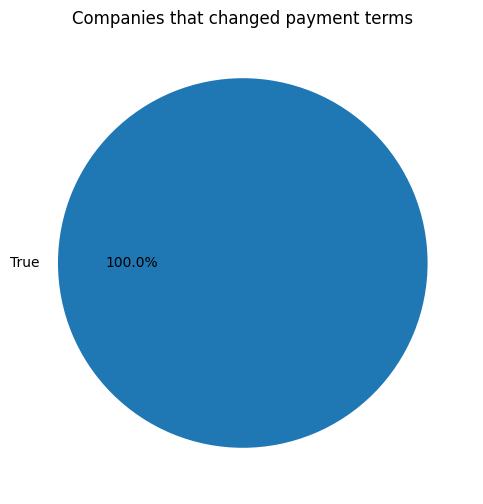

In [ ]:
#Payment terms changes analysis
payment_term_changes = data['Payment terms have changed'].value_counts()
plt.figure(figsize=(8,6))
payment_term_changes.plot(kind='pie',autopct='%1.1f%%')
plt.title('Companies that changed payment terms')
plt.ylabel('')
plt.show()

# **PROPORTION OF COMPANIES WHO ADOPTED E-INVOICING**

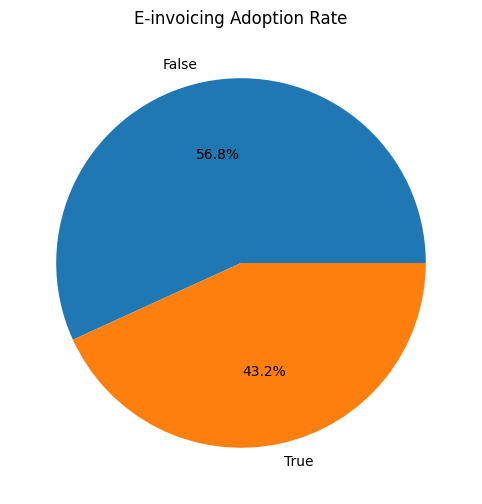

In [ ]:
e_invoicing_adoption = data['E-Invoicing offered'].value_counts()
plt.figure(figsize=(8,6))
e_invoicing_adoption.plot(kind='pie',autopct='%1.1f%%')
plt.title('E-invoicing Adoption Rate')
plt.ylabel('')
plt.show()

#**CORRELATION ANALYSIS**

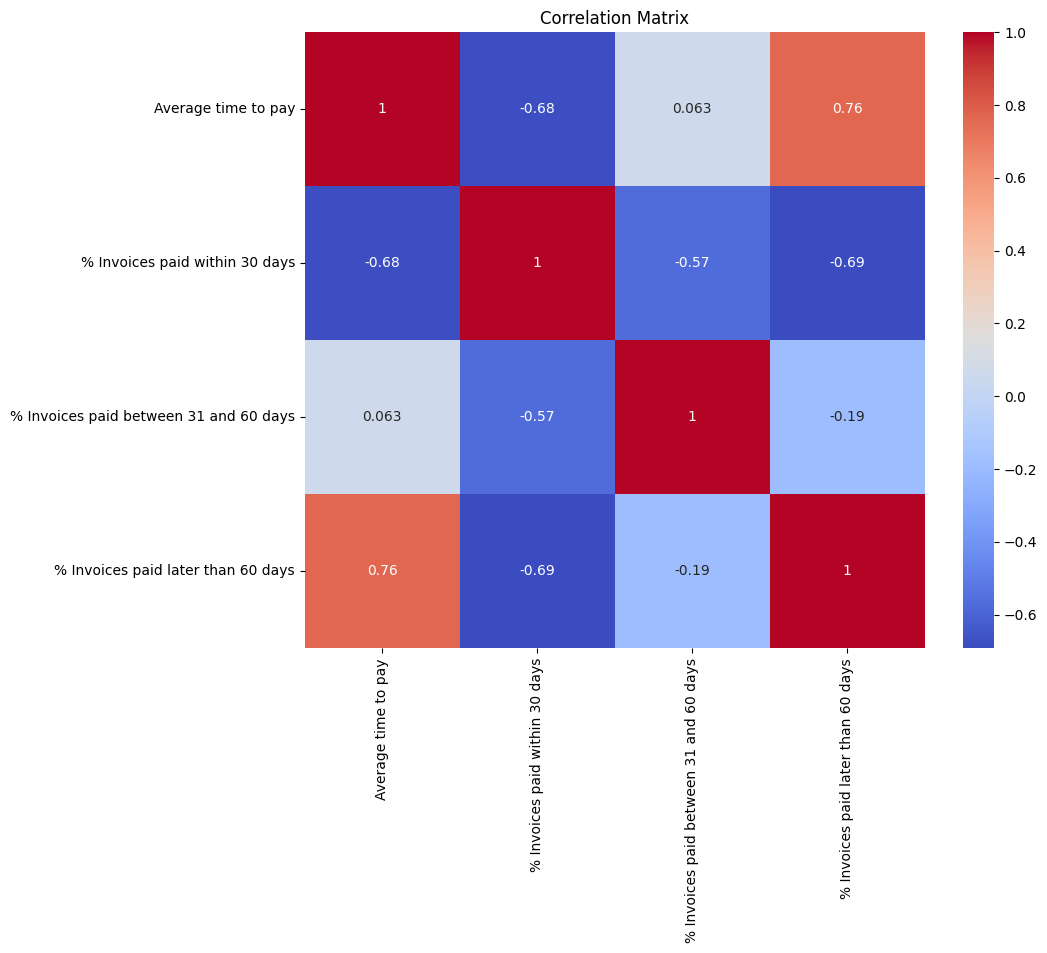

In [ ]:
correlation_matrix = data[['Average time to pay','% Invoices paid within 30 days',
                           '% Invoices paid between 31 and 60 days',
                           '% Invoices paid later than 60 days']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# **TEXT DATA ANALYSIS**

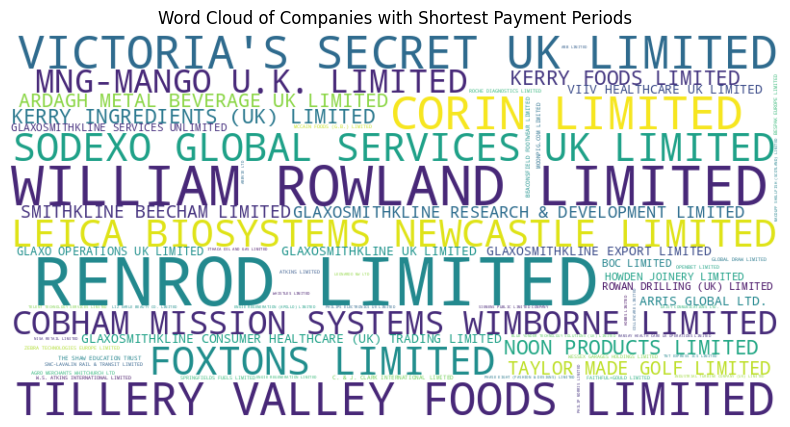

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np

# Load the dataset

# Sort companies by their shortest payment period
sorted_data = data.sort_values('Shortest (or only) standard payment period')

# Select top 20% of companies with shortest payment periods
top_payers = sorted_data.head(int(len(sorted_data) * 0.2))

def calculate_frequency(payment_period):
    return max(1, int(100 / (payment_period + 1)))

# Creating a dictionary of company names and their frequencies
company_freq = {company: calculate_frequency(period)
                for company, period in zip(top_payers['Company'],
                                           top_payers['Shortest (or only) standard payment period'])}

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(company_freq)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Companies with Shortest Payment Periods')
plt.show()




# **OVERALL TEXT ANALYSIS**

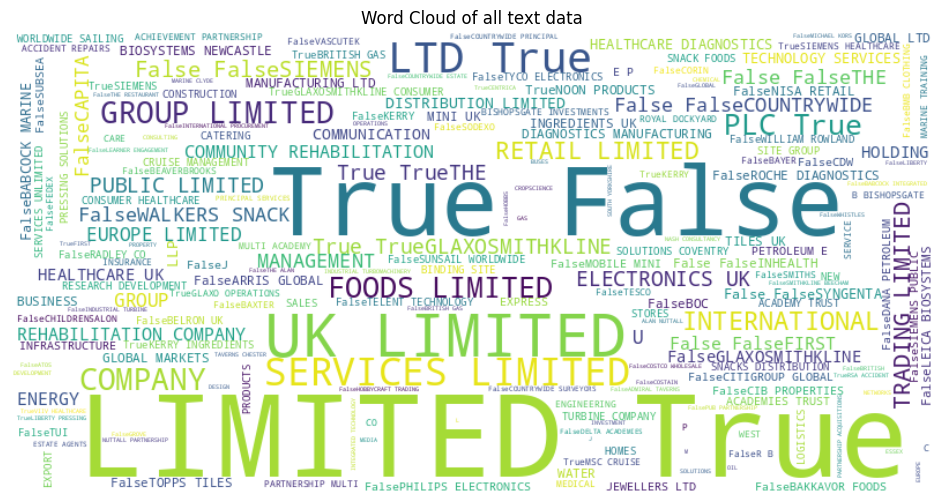

In [ ]:
data['all_text']=data['Company'].astype(str)+' '+data['Payment terms have changed'].astype(str).fillna('') + ' ' + \
data['E-Invoicing offered'].astype(str).fillna('') + ' ' + data['Supply-chain financing offered'].astype(str).fillna('')

all_text = ''.join(data['all_text'])
wordcloud = WordCloud(width=800,height=400,background_color='white').generate(all_text)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of all text data')
plt.show()

In [ ]:
from collections import Counter
import re
#Extracting words from all text fields
#Defining a function to extract words from text
def get_words(text):
  return re.findall(r'\b[a-zA-Z]+\b',text.lower())
all_words = [word for text in data['all_text'] for word in get_words(text) ]
word_freq = Counter(all_words) #counting frequency of each word
#getting 20 most common words
common_words = word_freq.most_common(20)
print(common_words)

[('true', 1661), ('false', 1354), ('limited', 875), ('uk', 173), ('services', 67), ('ltd', 63), ('group', 45), ('company', 45), ('the', 42), ('and', 32), ('foods', 28), ('siemens', 27), ('plc', 25), ('glaxosmithkline', 25), ('global', 24), ('retail', 24), ('healthcare', 22), ('international', 21), ('management', 18), ('diagnostics', 16)]


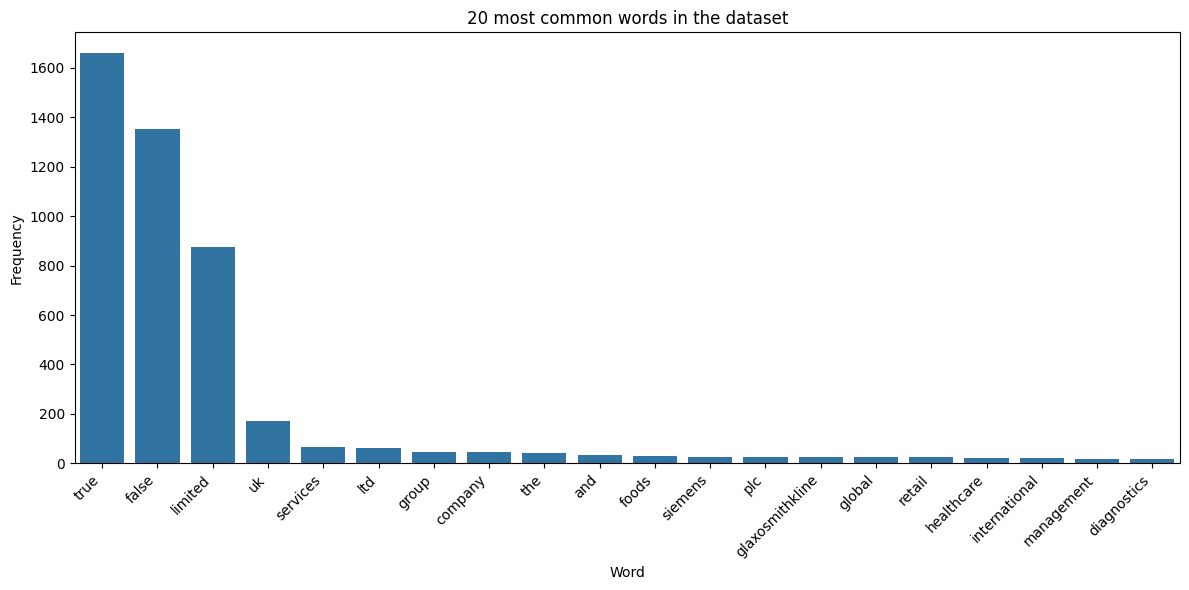

In [ ]:
#Creating bars for most common words
plt.figure(figsize=(12, 6))
sns.barplot(x=[word[0] for word in common_words],y=[word[1] for word in common_words])
plt.title('20 most common words in the dataset')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

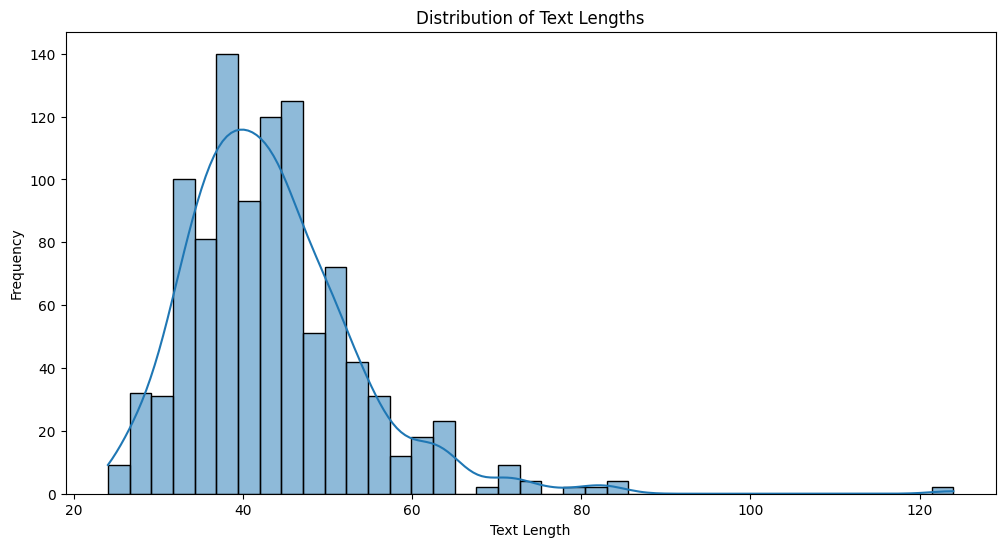

In [ ]:
#Finding length of each combined text entry
data['text_length'] = data['all_text'].apply(len)
plt.figure(figsize=(12,6))
sns.histplot(data['text_length'],kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

# **Distribution of E-Invoicing and Supply Chain Financing Adoption**

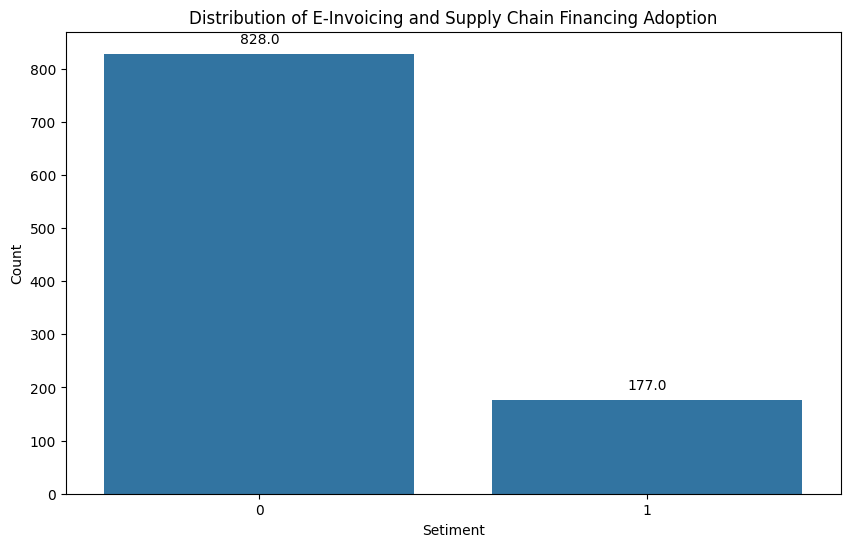

In [ ]:
data['sentiment'] = ((data['E-Invoicing offered']==True) & (data['Supply-chain financing offered']==True)).astype(int)
plt.figure(figsize=(10,6))
sns.countplot(x='sentiment',data=data)
plt.title('Distribution of E-Invoicing and Supply Chain Financing Adoption')
plt.xlabel('Setiment')
plt.ylabel('Count')
for p in plt.gca().patches:
  plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()



# **TIME SERIES ANALYSIS**

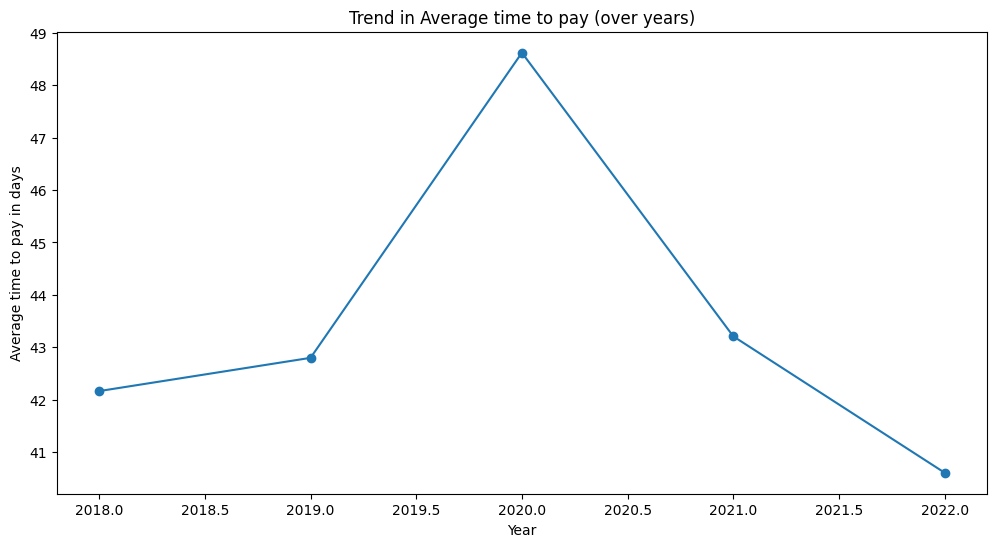

In [ ]:
data['Start date'] = pd.to_datetime(data['Start date'])
data['End date'] = pd.to_datetime(data['End date'])
data['Year'] = data['Start date'].dt.year
yearly_avg = data.groupby('Year')['Average time to pay'].mean()
plt.figure(figsize=(12,6))
yearly_avg.plot(kind='line',marker='o')
plt.title('Trend in Average time to pay (over years)')
plt.xlabel('Year')
plt.ylabel('Average time to pay in days')
plt.show()

# **Chi square test for testing for independence**

In [ ]:
#Chi square test for testing for indepedence
from scipy.stats import chi2_contingency
def chi_square_test(var1,var2):
  contingency_table = pd.crosstab(data[var1],data[var2])
  chi2, p_value, dof, expected = chi2_contingency(contingency_table)
  print(f"Chi-square test between {var1} and {var2}:")
  print(f"p-value:{p_value}")
  print("Contingency table:")
  print(contingency_table)
  print("\n")

for col in ['Participates in payment codes','E-Invoicing offered','Supply-chain financing offered']:
  chi_square_test('Payment terms have changed',col)

  #Showcases perfect independence between payment terms changing and

Chi-square test between Payment terms have changed and Participates in payment codes:
p-value:1.0
Contingency table:
Participates in payment codes  False  True 
Payment terms have changed                 
True                             849    156


Chi-square test between Payment terms have changed and E-Invoicing offered:
p-value:1.0
Contingency table:
E-Invoicing offered         False  True 
Payment terms have changed              
True                          571    434


Chi-square test between Payment terms have changed and Supply-chain financing offered:
p-value:1.0
Contingency table:
Supply-chain financing offered  False  True 
Payment terms have changed                  
True                              783    222




# **Machine Learning: Predicting Payment Behavior**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
features = ['% Invoices paid within 30 days', '% Invoices paid between 31 and 60 days',
            'Shortest (or only) standard payment period', 'Longest standard payment period']
X = data[features]
Y = data['Average time to pay']


In [ ]:
X_train, X_test, y_train,  y_test = train_test_split(X,Y,test_size = 0.3,random_state = 42)
model = RandomForestRegressor(n_estimators = 100,random_state = 42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
predictions = model.predict(X_test)
mse = mean_squared_error(y_test,predictions)
r2 = r2_score(y_test,predictions)
print(f"Mean Squared Error : {mse}")
print(f"R-squared score: {r2}")

Mean Squared Error : 102.50160175303296
R-squared score: 0.7654935187000741


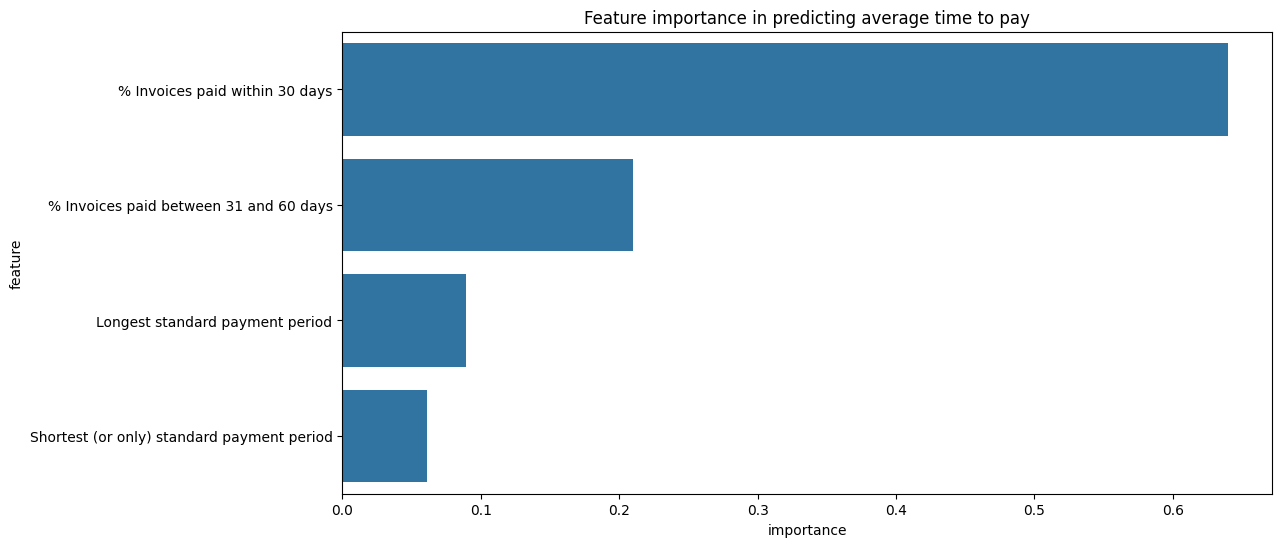

In [ ]:
importance = pd.DataFrame({'feature':features,'importance':model.feature_importances_})
importance = importance.sort_values('importance',ascending = False)
plt.figure(figsize=(12,6))
sns.barplot(x='importance',y='feature',data=importance)
plt.title('Feature importance in predicting average time to pay')
plt.show()

# **IMPACT ANALYSIS BY BOTH E-INVOICING AND SUPPLY CHAIN FINANCING**

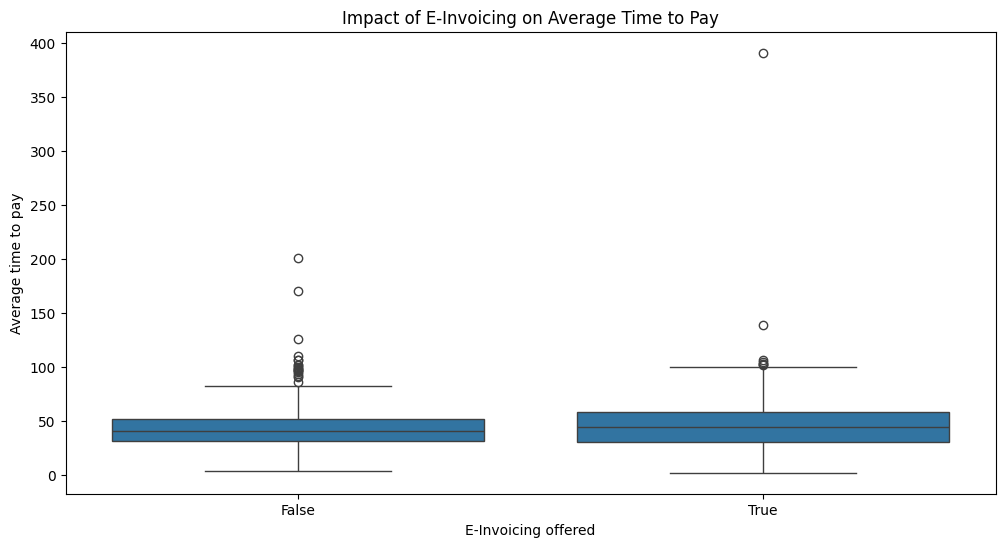

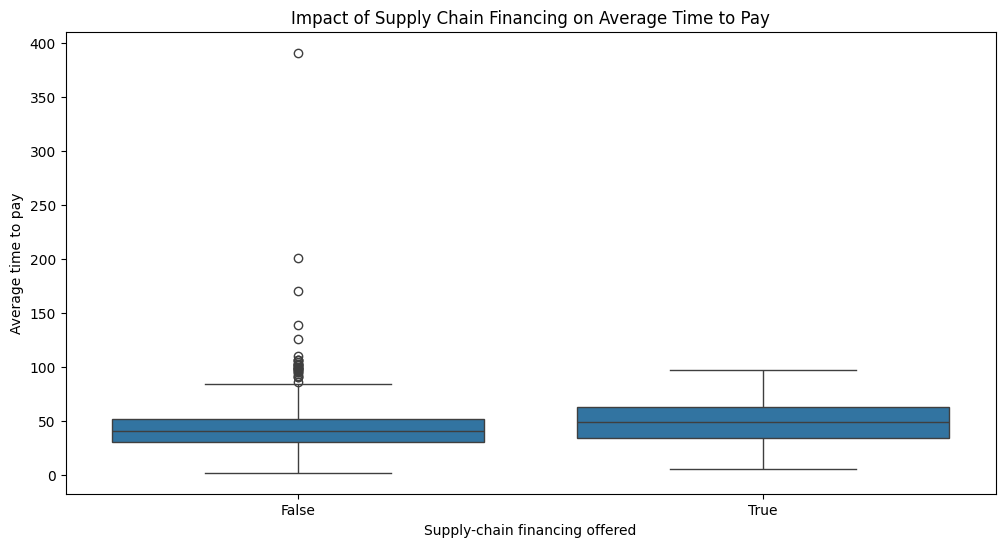

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='E-Invoicing offered', y='Average time to pay', data=data)
plt.title('Impact of E-Invoicing on Average Time to Pay')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Supply-chain financing offered', y='Average time to pay', data=data)
plt.title('Impact of Supply Chain Financing on Average Time to Pay')
plt.show()


# **FORECASTING VIA ARIMA**

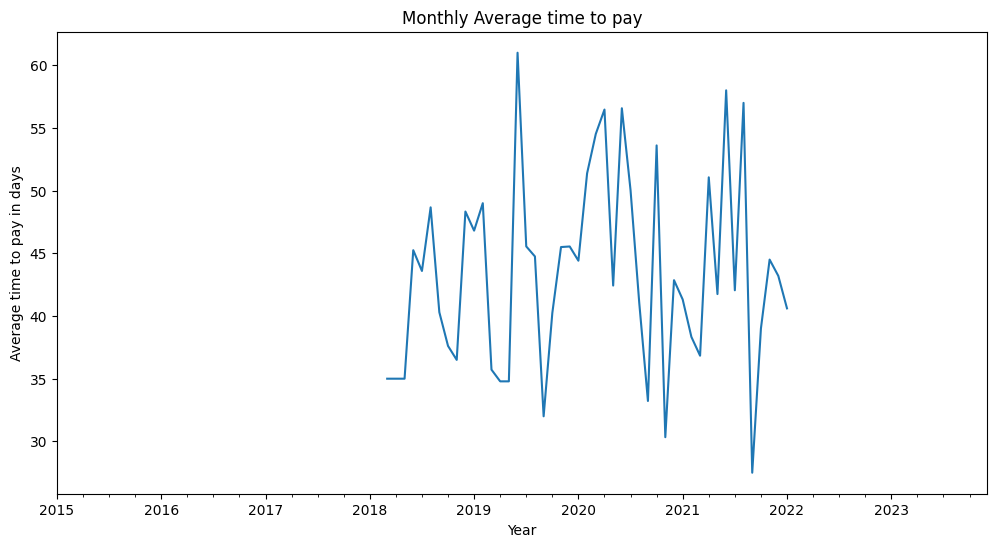

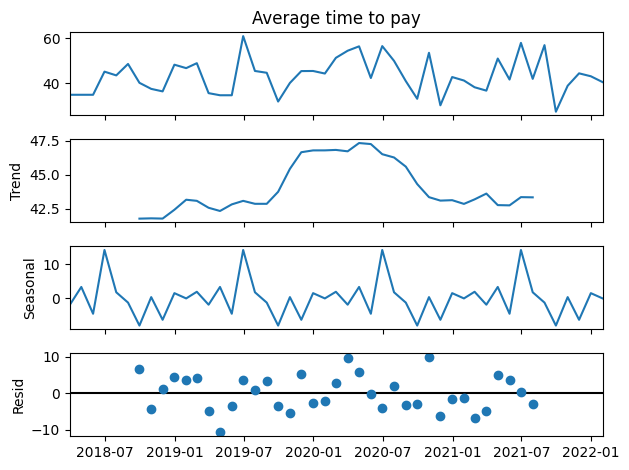

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
start_date = '2015-01-01'
end_date = '2023-12-31'
data['Start date'] = pd.to_datetime(data['Start date'])

# Set 'Start date' as index
data.set_index('Start date', inplace=True)
monthly_data = data['Average time to pay'].resample('M').mean() #resampling to monthly data
monthly_data = monthly_data.fillna(method='ffill') # Example: Forward fill missing values
plt.figure(figsize=(12,6))
monthly_data.plot()
plt.title('Monthly Average time to pay')
plt.xlabel('Year')
plt.xlim(pd.Timestamp(start_date), pd.Timestamp(end_date))
plt.ylabel('Average time to pay in days')
plt.show()

#Forecasting future values
#decompose time series
result = seasonal_decompose(monthly_data,model='additive')
result.plot()
plt.tight_layout()
plt.show()


In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.5 MB/s eta 0:00:00


Forecast for the next 14 months
2022-02-28    41.770459
2022-03-31    41.322942
2022-04-30    45.567757
2022-05-31    42.789803
2022-06-30    47.637904
2022-07-31    42.880092
2022-08-31    47.339559
2022-09-30    38.538392
2022-10-31    41.969356
2022-11-30    43.610251
2022-12-31    43.222403
2023-01-31    42.449301
2023-02-28    42.795907
2023-03-31    42.662393
Freq: M, dtype: float64


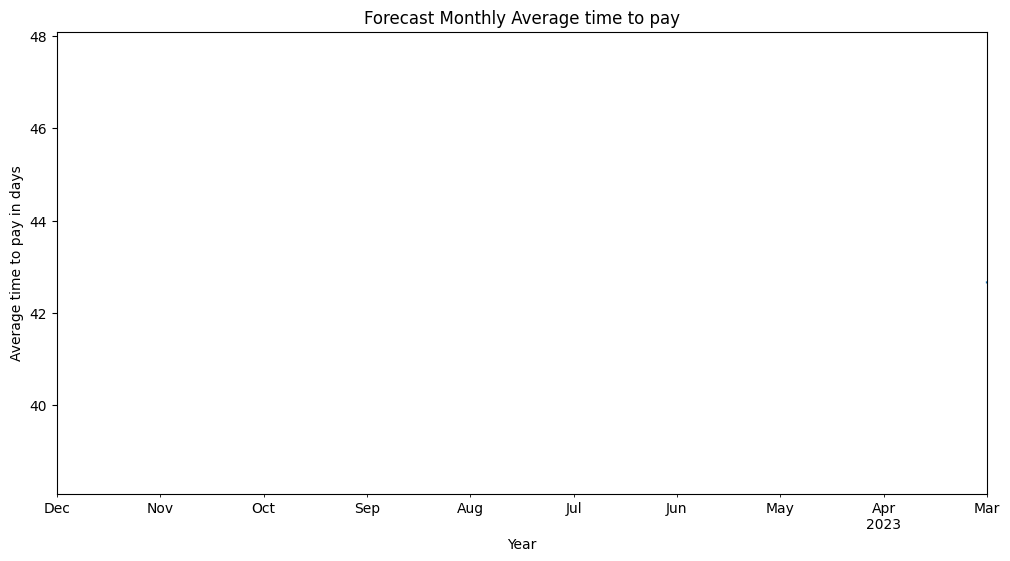

In [ ]:
#Forecasting future values
model = auto_arima(monthly_data,seasonal=True,m=12)
forecast= model.predict(n_periods = 14)
print("Forecast for the next 14 months")
print(forecast)
plt.figure(figsize=(12,6))
forecast.plot()
plt.title('Forecast Monthly Average time to pay')
plt.xlabel('Year')
plt.xlim(pd.Timestamp(end_date))
plt.ylabel('Average time to pay in days')
plt.show()

# **ANOMALY DETECTION**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


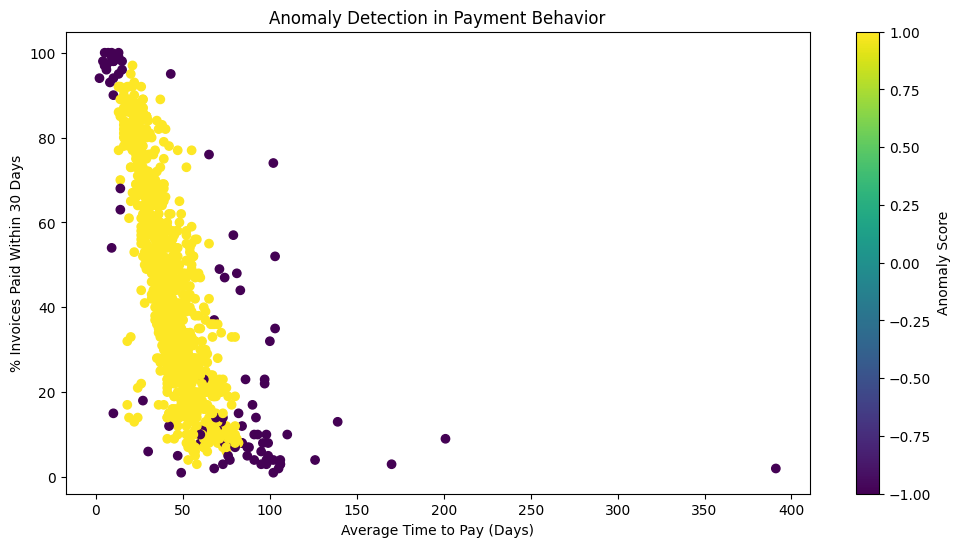

In [ ]:
from sklearn.ensemble import IsolationForest
features = ['Average time to pay', '% Invoices paid within 30 days', '% Invoices paid later than 60 days']
clf = IsolationForest(contamination=0.1,random_state=42)
data['anomaly'] = clf.fit_predict(data[features])
#Visualize anomalies
plt.figure(figsize=(12,6))
plt.scatter(data['Average time to pay'],
            data['% Invoices paid within 30 days'],
            c= data['anomaly'],
            cmap = 'viridis')
plt.title('Anomaly Detection in Payment Behavior')
plt.xlabel('Average Time to Pay (Days)')
plt.ylabel('% Invoices Paid Within 30 Days')
plt.colorbar(label='Anomaly Score')
plt.show()

# **Interpretable Machine Learning**

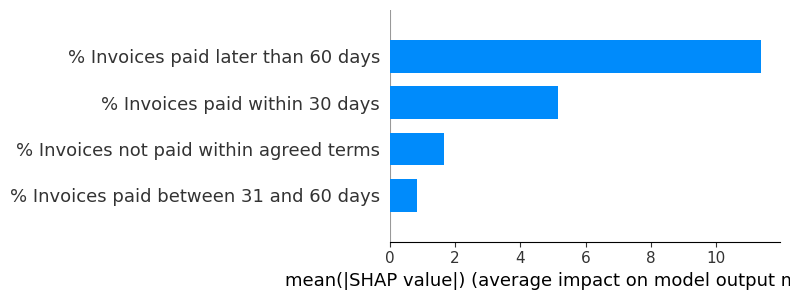

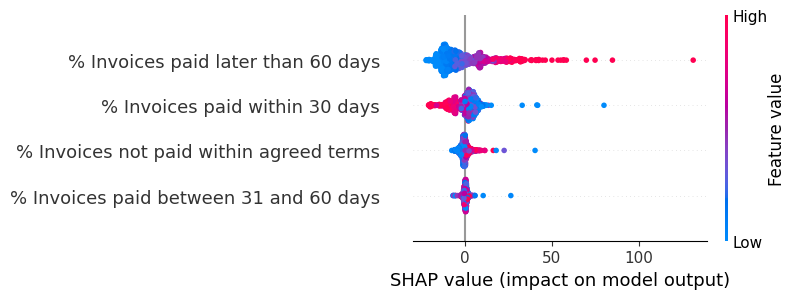

In [ ]:
import shap
from sklearn.ensemble import RandomForestRegressor
features = ['% Invoices paid within 30 days', '% Invoices paid between 31 and 60 days',
            '% Invoices paid later than 60 days', '% Invoices not paid within agreed terms']
X=data[features]
y=data['Average time to pay']
#Train a random forest model
model = RandomForestRegressor(n_estimators = 100,random_state =42)
model.fit(X,y)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
#Visualize SHAP values
shap.summary_plot(shap_values,X,plot_type = 'bar')
plt.show()

shap.summary_plot(shap_values,X)
plt.show()

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 3.6 MB/s eta 0:00:00


# **EXPERIMENTING WITH FEDERATED LEARNING (SIMPLE DEMONSTRATION)**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/sample_data/payment-practices (1).csv', parse_dates=['End date', 'Filing date'])

In [ ]:
df.head(5)

,Report Id,Start date,End date,Filing date,Company,Company number,Payments made in the reporting period,Average time to pay,% Invoices paid within 30 days,% Invoices paid between 31 and 60 days,...,Longest standard payment period,Maximum contractual payment period,Payment terms have changed,Suppliers notified of changes,Participates in payment codes,E-Invoicing offered,Supply-chain financing offered,Policy covers charges for remaining on supplier list,Charges have been made for remaining on supplier list,URL
0,2,2017-04-29,2017-10-28,2017-11-07,MEDTRONIC LIMITED,01070807,NaN,25.0,77.0,20.0,...,60.0,60.0,False,NaN,False,True,False,False,False,https://check-payment-practices.service.gov.uk...
1,3,2017-05-01,2017-10-31,2017-11-08,SEBDEN STEEL SERVICE CENTRES LIMITED,02553464,NaN,69.0,7.0,28.0,...,NaN,75.0,False,NaN,False,False,False,False,False,https://check-payment-practices.service.gov.uk...
2,4,2017-04-15,2017-10-14,2017-11-08,GREENERGY FLEXIGRID LIMITED,07581532,NaN,21.0,89.0,9.0,...,30.0,30.0,False,NaN,False,False,False,True,True,https://check-payment-practices.service.gov.uk...
3,5,2017-04-15,2017-10-14,2017-11-08,GREENERGY FUELS LIMITED,04058825,NaN,14.0,90.0,8.0,...,30.0,30.0,False,NaN,False,False,False,True,True,https://check-payment-practices.service.gov.uk...
4,6,2017-04-15,2017-10-14,2017-11-08,GREENERGY INTERNATIONAL LIMITED,02809935,NaN,15.0,96.0,2.0,...,30.0,30.0,False,NaN,False,False,False,True,False,https://check-payment-practices.service.gov.uk...


In [ ]:
sample = data.sample(n=30,random_state = 42)
sample.head()

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import shap
import matplotlib.pyplot as plt

In [35]:
# Load the data
data = pd.read_csv('/content/sample_data/payment-practices (1).csv')
features = ['% Invoices paid within 30 days', '% Invoices paid between 31 and 60 days',
            '% Invoices paid later than 60 days', 'Average time to pay']
data = data[features]
data = data.dropna(subset=['Average time to pay'])
X = data[["% Invoices paid within 30 days",'% Invoices paid between 31 and 60 days',
          '% Invoices paid later than 60 days']]
y = data['Average time to pay']
#Scaling the features :
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size = 0.2,random_state=42)
num_clients = 3
client_data = np.array_split(X_train,num_clients)
client_labels = np.array_split(y_train,num_clients)

def federated_learning(client_data,client_labels,num_rounds = 5):
  global_model = HistGradientBoostingRegressor(random_state=42)

  for round in range(num_rounds):
    print(f"Round {round + 1}")
    client_predictions = []

    for i in range(len(client_data)):
      model = HistGradientBoostingRegressor(random_state = 42)
      model.fit(client_data[i],client_labels[i])
      client_predictions.append(model.predict(np.concatenate(client_data)))

      #Aggregating predictions(simple averaging)
      aggregated_predictions = np.mean(client_predictions, axis = 0)

      #Update global model
      global_model.fit(np.concatenate(client_data),aggregated_predictions)

      return global_model


Round 1
Model's MSE : 746.5235


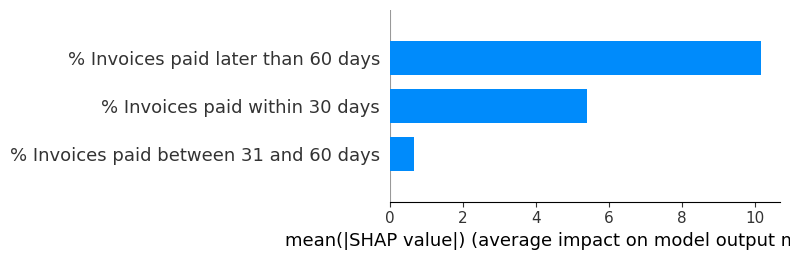

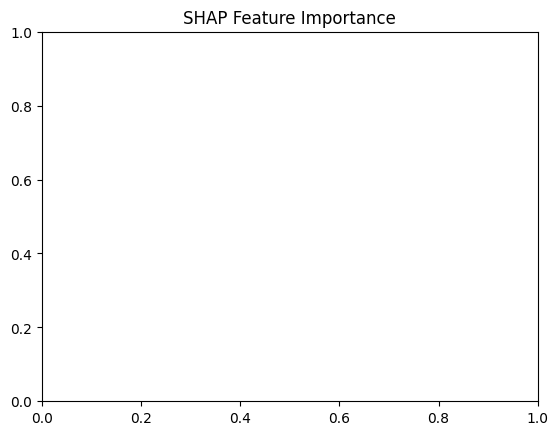

In [38]:
#Fitting the federated model :
federated_model = federated_learning(client_data,client_labels)
#Evaluating the model
y_pred = federated_model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print(f"Model's MSE : {mse:.4f}")

#Shap based feature importnace
explainer = shap.TreeExplainer(federated_model)
shap_values = explainer.shap_values(X_test)

#Plot SHAP feature importance
plt.figure(figsize=(10,6))
shap.summary_plot(shap_values,X_test,plot_type="bar", feature_names=['% Invoices paid within 30 days', '% Invoices paid between 31 and 60 days', '% Invoices paid later than 60 days'])
plt.title('SHAP Feature Importance')
plt.show()



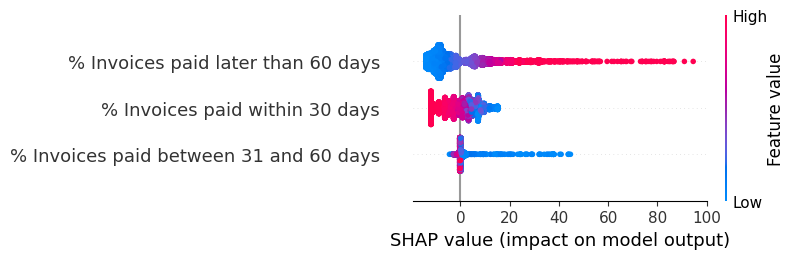

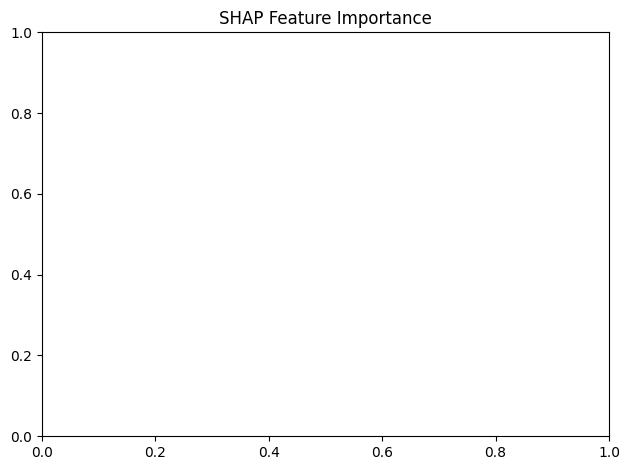

In [39]:
plt.figure(figsize=(10,6))
shap.summary_plot(shap_values,X_test,feature_names=['% Invoices paid within 30 days', '% Invoices paid between 31 and 60 days', '% Invoices paid later than 60 days'])
plt.title('SHAP Feature Importance')
plt.tight_layout()
plt.show()